# S.I.R. Modell

Diese Case-Study ist vom Blog-post von Bhaskar Krishnamachari [1] sowie der Fallstudie aus dem Buch "Learning Scientific Python" von Christian Hill [2] inspiriert. 



Das S.I.R Model ist ein klassischer Ansatz in der Epidemiologie zur Modellierung der Ausbreitung von Krankheiten mit Immunität in einer Population. Jede Person wird dabei in eine von drei Gruppen eingeteilt:
* Gruppe S (Susceptible): Nicht immune, gesunde Personen
* Gruppe I (Infected): Infizierte Personen
* Gruppe R (Recovered): Genesene (immunisierte) Personen

Es werden folgende vereinfachenden Annahmen gemacht:
* Jede Person wird nur einmal infiziert und wird danach gesund oder stirbt.
* Infizierte sind sofort ansteckend.
* Die Infektionsrate ist konstant.
* Die verstorbenen Personen werden wie die Immunisierten zu R gezählt. 

Mathematisch entspricht das Modell einer gekoppelten Differentialgleichung. Wir werden aber gleich sehen, dass dies in unserer Simulation etwas ganz einfaches ist. Das Modell definiert dabei wie sich S, I und R über einen Zeitschritt ändern und ist wie folgt definiert:
$$
\begin{align}
\frac{dS}{dt} &= -\beta \frac{SI}{N}  \\
\frac{dI}{dt} &= \beta \frac{SI}{N} - \gamma I  \\
\frac{dR}{dt}  &= R_t + \gamma I_t
\end{align}
$$
Dabei bezeichnet die berechnete Zahl $\frac{dX}{dt}$ jeweils die Änderung der Grösse $X$ in einem Zeitschritt.  Die Zahl $\beta$ bezeichnet die Ansteckungsrate (wieviele Ansteckungen ein Fall pro Zeiteinheit verursacht) und die Zahl $\gamma$ die Rate mit der sich infizierte erholen. Die Zahl $N = S + I + R$ bezeichnet die totale Anzahl Personen in der Simulation.

Wie erwähnt ist in unserer Computersimulation das Berechnen der Differentialgleichung sehr einfach. In unserer Simulation entspricht ein Zeitschritt einem Tag. Wir berechnen die zu erwartende Änderung pro Gruppe (S, I, R) während des Tages und addieren diese dann zur Situation am aktuellen Tag. So erhalten wir die Prognose für den Zustand am nächsten Tag. Wir berechnen also Folgendes:

$$
\begin{align}
S_{t+1}  &= S_{t} + (-\beta \frac{S_{t}I_{t}}{N})  \\
I_{t+1} &= I_{t} + \beta \frac{S_{t}I_{t}}{N} - \gamma I_{t}  \\
R_{t+1}  &= R_{t} + \gamma I_{t}\\
\end{align}
$$

Dabei bezeichen $S_{t}$, $I_{t}$ und $R_{t}$ jeweils die Situation am aktuellen Tag und $S_{t+1}, I_{t+1}, R_{t+1}$ die Situation am nächsten Tag. Sie sehen, alle Gleichungen bestehen aus einfachen Produkten, Brüchen, Additionen, Subtraktionen bzw. dem Umkehren des Vorzeichens.


Wir werden dieses Modell nun in Python simulieren indem wir die Berechnungen implementieren und dann wiederholt in einer Schleife anwenden, um die Werte für eine bestimmte Anzahl Tage zu erhalten.

#### Bibliotheken

Um die Verläufe zu plotten nutzen wir wieder pyplot, welches wir mit der nächsten Zeile importieren. 

In [1]:
from matplotlib.pyplot import *

#### Ein Teilschritt der Simulation

Wir schreiben uns als erstes eine Funktion, welche den aktuellen Zustand der Population (beschrieben durch $S, I, R$) sowie die Parameter $\beta$ und $\gamma$ entgegennimmt und uns die Veränderung von $R$ für einen Tag nach obiger Formel berechnet und zurück gibt.

In [3]:
def nextDayR(S, I, R, beta, gamma):
    newR = R + gamma * I
    return newR

nextDayR(100,100,100, 0.2, 0.04)

104.0

#### Ein Schritt der Simulation

Nun machen wir das ganze für alle drei Grössen $S, I, R$ zusammen. Der Rückgabewert der Funktion ist nun nicht mehr nur eine Zahl, sondern ein Tupel mit den neuen Werten für $S, I$ und $R$. 

In [7]:
# Differentialgleichungen des S.I.R. Modells
def nextDay(S, I, R, beta, gamma):
    N = S + I + R
    newS = S - beta * S * I / N
    newI = I + beta * S * I / N - gamma * I
    newR = R + gamma * I
    return (newS, newI, newR)


Mit Hilfe der Funktion `nextDay` können wir nun den Verlauf einfach simulieren. Wir initialisieren die Parameter und rufen dann die Funktion ```nextDay``` innerhalb einer Schleife auf. In jedem Schleifendurchlauf wird ein Tag simuliert. 
Dabei speichern wir den jeweiligen Zustand der Population in Listen, damit wir diesen am Ende visualisieren können. 

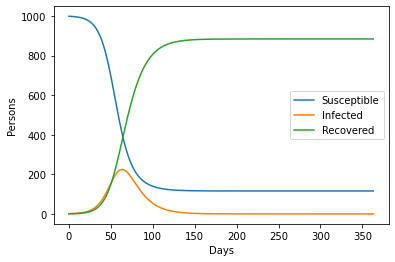

In [8]:
# Anfangszustand
N = 1000       # Anzahl Personen
I = 1          # Infizierte
R = 0          # Genesene
S = N - I - R  # Gefährdete Personen

# Parameter
beta = 0.2        # Ansteckungsrate
gamma = 1.0 / 12  # Genesungsrate

# In diesen Listen werden die Zahlen pro Tag gespeichert
Ss = []
Is = []
Rs = []

# Simulation mehrerer Tage
days = 365
for i in range(1, days):
    (S, I, R) = nextDay(S, I, R, beta, gamma)
    Ss.append(S)
    Is.append(I)
    Rs.append(R)

# Visualisierung
plot(Ss, label= "Susceptible")
plot(Is, label= "Infected")
plot(Rs, label = "Recovered")
legend()
xlabel("Days")
ylabel("Persons")
show()

### Übungen zum selber probieren

* Erweitern Sie die Simulation, so dass die Immunität wieder verloren gehen kann. Führen Sie dazu einen neuen Modellparameter $\delta$ ein
* Erweitern Sie die Simulation, so dass infizierte Personen zu einem bestimmten Anteil sterben können.
* Erweitern Sie die Simulation, so dass auch neue Personen geboren werden können. 

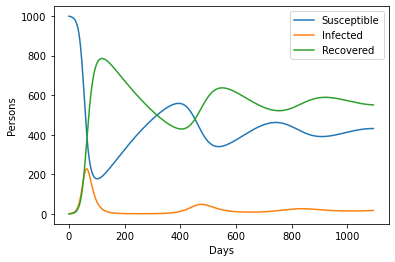

In [10]:
# Differentialgleichungen des S.I.R. Modells
def nextDay2(S, I, R, beta, gamma, delta):
    N = S + I + R
    newS = S - beta * S * I / N + delta * R
    newI = I + beta * S * I / N - gamma * I
    newR = R + gamma * I - delta * R
    return (newS, newI, newR)

# Anfangszustand
N = 1000       # Anzahl Personen
I = 1          # Infizierte
R = 0          # Genesene
S = N - I - R  # Gefährdete Personen

# Parameter
beta = 0.2        # Ansteckungsrate
gamma = 1.0 / 12  # Genesungsrate
delta = 1.0 / 365 # Immunitätsverlustrate

# In diesen Listen werden die Zahlen pro Tag gespeichert
Ss = []
Is = []
Rs = []

# Simulation mehrerer Tage
days = 3*365
for i in range(1, days):
    (S, I, R) = nextDay2(S, I, R, beta, gamma, delta)
    Ss.append(S)
    Is.append(I)
    Rs.append(R)

# Visualisierung
plot(Ss, label= "Susceptible")
plot(Is, label= "Infected")
plot(Rs, label = "Recovered")
legend()
xlabel("Days")
ylabel("Persons")
show()

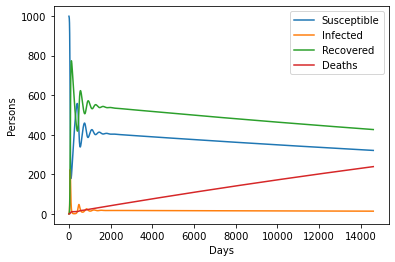

In [14]:
# Differentialgleichungen des S.I.R. Modells
def nextDay3(S, I, R, D, beta, gamma, delta, omega):
    N = S + I + R
    newS = S - beta * S * I / N + delta * R
    newI = I + beta * S * I / N - gamma * I - omega * I
    newR = R + gamma * I - delta * R
    newD = D + omega * I
    return (newS, newI, newR, newD)

# Anfangszustand
N = 1000       # Anzahl Personen
I = 1          # Infizierte
R = 0          # Genesene
D = 0          # Gestorbene
S = N - I - R  # Gefährdete Personen

# Parameter
beta = 0.2         # Ansteckungsrate
gamma = 1.0 / 12   # Genesungsrate
delta = 1.0 / 365  # Immunitätsverlustrate
omega = 1.0 / 1000 # Sterberate

# In diesen Listen werden die Zahlen pro Tag gespeichert
Ss = []
Is = []
Rs = []
Ds = []

# Simulation mehrerer Tage
days = 40*365
for i in range(1, days):
    (S, I, R, D) = nextDay3(S, I, R, D, beta, gamma, delta, omega)
    Ss.append(S)
    Is.append(I)
    Rs.append(R)
    Ds.append(D)

# Visualisierung
plot(Ss, label= "Susceptible")
plot(Is, label= "Infected")
plot(Rs, label = "Recovered")
plot(Ds, label = "Deaths")
legend()
xlabel("Days")
ylabel("Persons")
show()

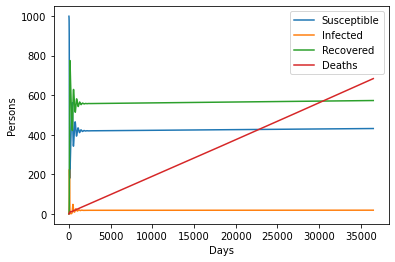

In [24]:
# Differentialgleichungen des S.I.R. Modells
def nextDay3(S, I, R, D, alpha, beta, gamma, delta, omega):
    N = S + I + R
    newS = S - beta * S * I / N + delta * R + alpha * (S + R)
    newI = I + beta * S * I / N - gamma * I - omega * I
    newR = R + gamma * I - delta * R
    newD = D + omega * I
    return (newS, newI, newR, newD)

# Anfangszustand
N = 1000       # Anzahl Personen
I = 1          # Infizierte
R = 0          # Genesene
D = 0          # Gestorbene
S = N - I - R  # Gefährdete Personen

# Parameter
alpha = 1.0 / (140*365) # Geburtenrate
beta = 0.2             # Ansteckungsrate
gamma = 1.0 / 12       # Genesungsrate
delta = 1.0 / 365      # Immunitätsverlustrate
omega = 1.0 / 1000     # Sterberate

# In diesen Listen werden die Zahlen pro Tag gespeichert
Ss = []
Is = []
Rs = []
Ds = []

# Simulation mehrerer Tage
days = 100*365
for i in range(1, days):
    (S, I, R, D) = nextDay3(S, I, R, D, alpha, beta, gamma, delta, omega)
    Ss.append(S)
    Is.append(I)
    Rs.append(R)
    Ds.append(D)

# Visualisierung
plot(Ss, label= "Susceptible")
plot(Is, label= "Infected")
plot(Rs, label = "Recovered")
plot(Ds, label = "Deaths")
legend()
xlabel("Days")
ylabel("Persons")
show()

### Referenzen
1. [Bhaskar Krishnamachari - Simulating Covid-19 with 6 lines of code — the SIR epidemic model](https://medium.com/@bhaskark2/simulating-covid-19-in-6-lines-of-code-the-sir-epidemic-model-89aab118cb7b)
2. [Christian Hill - Learning Scientific Programming with Python](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)
